# Feature extraction

The aim of this project is to find the best way to extract features from text data (BBC News Dataset) and apply supervised & unsupervised machine learning algorithms to predict the label of the news article  

#### Import necessary modules from sklearn, scipy, numpy 

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import scipy
import os
from scipy.io import mminfo,mmread,mmwrite
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from time import time
import itertools
import matplotlib.pyplot as plt
%matplotlib inline  

#### Change Directory

In [2]:
### this line is not required
# os.chdir('C:\Python27\learning_from_unstructured_data')

### Count Vectorizer Function

This function gives the bag of words for the entire vocabulary across all datasets

In [3]:
def call_countvectorizer(data):
    count_vect = CountVectorizer()
    count_vec_matrix = count_vect.fit_transform(data)
    #print count_vect.vocabulary
    return count_vec_matrix

### Transform Countvectorizer Matrix

This function returns the transpose of the countvectorizer matrix

In [4]:
def transform_countvec_matrix(mat):
    #convert read matrix to a csr matrix
    mat = mat.tocsr()
    #transpose matrix
    mat =  mat.transpose()
    return mat

### TFIDF Transformer Function

This function takes the countvectorizer matrix as input and returns the tfidf matrix

In [5]:
def call_tfidftransformer(data):
    tf_transformer = TfidfTransformer(use_idf=True).fit(data)
    tfidf_matrix = tf_transformer.transform(data)
    return tfidf_matrix

### Variance Threshold Function
This function returns only those features whose tfidf's variance is more than the specified cut-off

In [6]:
def variance_threshhold(tfidf_matrix):
    '''
        (tfidf matrix) -> CSV file in 'output_dataset' folder with low variance features removed
        'Removes features with variance less than 0.000017669'
    '''
    tfidf_numpy = tfidf_matrix.toarray()
    selector = VarianceThreshold(threshold=0.000017669)
    tfidf_numpy_variance_thresshold = selector.fit_transform(tfidf_numpy)
    
    #Dataset for unsupervised learning
    np.savetxt("output_dataset/features_removed_usl.csv",tfidf_numpy_variance_thresshold , delimiter=",")
    
    labels = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[3],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4]]
    
    #dataset for supervised learning - add label as last column\n",
    tfidf_cols_deleted_sl = np.append(tfidf_numpy_variance_thresshold,labels,1)
    np.savetxt("output_dataset/features_removed_sl.csv",tfidf_cols_deleted_sl , delimiter=",")

### Select K Best Features Function

This function uses chi square test on categorical variables to remove highly correlated features
NOTE - Please don't use this for now - Changes have to be made to the output

In [7]:
def select_k_best(tfidf_matrix,k):
    '''
    (tfidf matrix) -> CSV file in 'output_dataset' folder with best 5000 features
    'Removes features with high correlation'
    '''
    labels=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4]
    tfidf_numpy = tfidf_matrix.toarray()

    tfidf_numpy[tfidf_numpy>0]=1
    tfidf_numpy[tfidf_numpy==0]=0
    tfidf_features_removed = SelectKBest(chi2, k=5000).fit_transform(tfidf_numpy, labels)
    #print tfidf_features_removed.shape
    np.savetxt("output_dataset/test.csv",tfidf_features_removed,delimiter=",")


### Test Sample Data Function

This function is used to test countvectorizer and tfidf matrix functions on some sample data

In [8]:
def test_sample_data(): 
    sample_text = ["The quick brown fox jumped over the well London happy sad ecstatic","this is a test sentence about a fox"]
    countvec_data=call_countvectorizer(sample_text)
    tfidf_data = call_tfidftransformer(countvec_data)
    print tfidf_data

### Main Function

This is the function from where all the other functions are called

In [9]:
if __name__ == '__main__': 
    
    # Read BBC count vectorizer matrix from .mtx file and transform it
    mat = mmread('original_dataset/bbc.mtx')
    mat = transform_countvec_matrix(mat)
    
    # Generate tfidf matrix from the above count vecorizer matrix
    tfidf_matrix= call_tfidftransformer(mat)

    # Write the final tfidf matrix to a .mtx file 
    mmwrite('output_dataset/tfidfweightsmatrix.mtx',tfidf_matrix)
    
    # Call variance threshhold function to remove features with low tfidf variance
    variance_threshhold(tfidf_matrix)

## Unsupervised Learning using K-means++

This code block is defining the k values (k value is the number of clusters that will be formed in the clustering) and is declaring a list and dictionary for storing time spent and number of documents in each cluster for each k value after the analysis respectively. Also it is initializing the X.

In [10]:
# number of clusters
kValues = range(2,6)
timeSpendForEachK = []
numberOfDocumentsInEachCluster = {}
X = tfidf_matrix

This code block is performing k-means for different k-values and calculating the time spend for each. Moreover it is inserting data of number of documents in each cluster for each k value. 

In [11]:
for k in kValues:
    # Appyling Kmeans on X
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1,
                verbose=False, random_state=8)

    print("Clustering sparse data with %s" % km)
    t0 = time()
    km.fit(X)
    timeSpendForEachK.append(time() - t0)
    # print("done in %0.3fs" % (time() - t0))

    #Getting the number of documents in each cluster
    dictOfDocumentsInEachLable = {}
    for i in range(k):
        dictOfDocumentsInEachLable[i] = len([label for label in km.labels_ if label == i])
    numberOfDocumentsInEachCluster[k] = dictOfDocumentsInEachLable

Clustering sparse data with KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=2, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=8, tol=0.0001,
    verbose=False)
Clustering sparse data with KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=3, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=8, tol=0.0001,
    verbose=False)
Clustering sparse data with KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=4, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=8, tol=0.0001,
    verbose=False)
Clustering sparse data with KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=5, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=8, tol=0.0001,
    verbose=False)


### plotting Time Spend vs K Values

The time vs kvalues graph tells us that how long did it took for the algorithm to converge i.e. to find the local minima. Kmeans works on the principle of finding the centroid i.e. cluster center which is at the minimum distance from the data point for each data point and put that data point in that particular cluster. As the cluster centers are choosen randomly so we cannot always predict the time it will take for algorithm to finish for each k value. That is the reason why there is randomness in the plot.

plotting Time Spend vs K Values


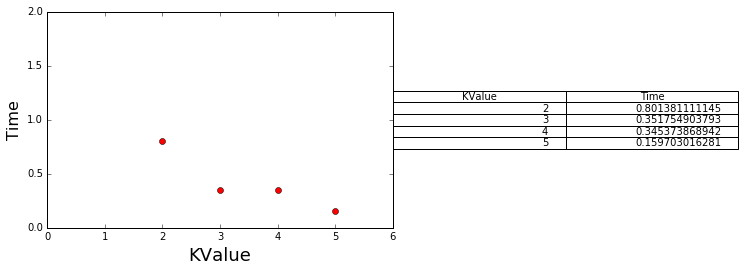

In [12]:
print ("plotting Time Spend vs K Values")
XValues = []
YValues = []

#plotting the graph
XValues = kValues
YValues = timeSpendForEachK
plt.figure(7)
plt.plot(XValues, YValues, 'ro')
plt.axis([0,len(kValues)+2,0,2])
plt.xlabel('KValue', fontsize=18)
plt.ylabel('Time', fontsize=16)

#plotting the table
cellText = []
for x,y in zip(XValues,YValues):
    cellText.append((x,y,))
plt.table(cellText=cellText,
          colLabels=['KValue','Time'],
          loc='right')
plt.subplots_adjust(top=.8,left=0.1, bottom=0.05)
plt.show()

### Plotting Number of documents in each cluster vs cluster number(label)
The cluster number is starting from zero because the label that algorithm assigns while forming cluster starts from 0 and goes till k-1.

Plotting Number of documents in each cluster vs cluster


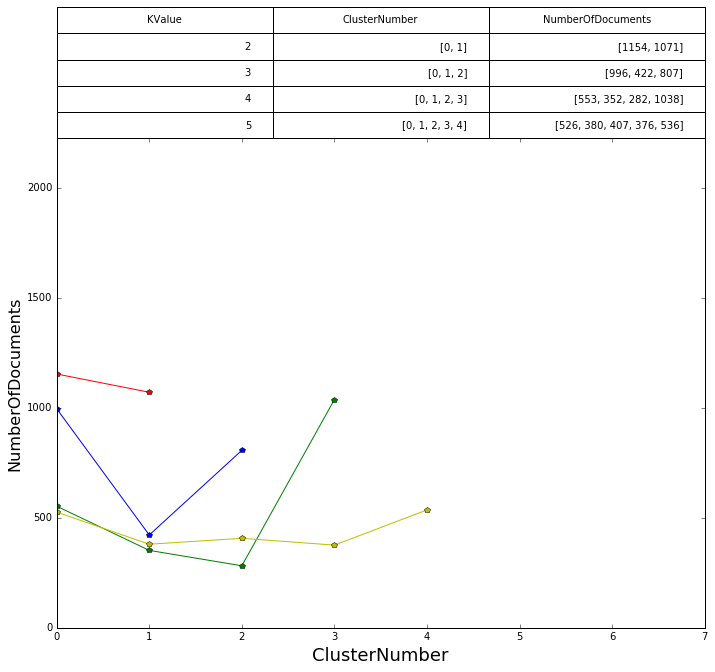

In [13]:
print ("Plotting Number of documents in each cluster vs cluster")
XValues = []
YValues = []


# colors in listOfColors is in the ascending order of the number of cluster i.e. 0 to n
listOfColors = ['rp-','bp-','gp-','yp-','kp-','mp-','gp--','rp--']
plt.figure(6)

# Extracting x and y values for plotting the graph
for k in kValues:
    listOfDocumentsInEachk = []
    for lable in range(k):
        listOfDocumentsInEachk.append(numberOfDocumentsInEachCluster[k][lable])
    XValues.append(range(0,k))
    YValues.append(listOfDocumentsInEachk)

# plotting the graph
plt.plot(XValues[0],YValues[0],listOfColors[0], XValues[1],YValues[1],listOfColors[1], \
    XValues[2],YValues[2],listOfColors[2], XValues[3],YValues[3],listOfColors[3])

plt.axis([0,len(kValues)+3,0,2225])
plt.xlabel('ClusterNumber', fontsize=18)
plt.ylabel('NumberOfDocuments', fontsize=16)

#plotting the table
cellText = []
for x,y,k in itertools.izip(XValues,YValues,kValues):        
    cellText.append((k,x,y,))
plt.table(cellText=cellText,
          colLabels=['KValue','ClusterNumber','NumberOfDocuments'],
          loc='top')
plt.subplots_adjust(top=1.7,left=2,right=3.5,bottom=.001)
plt.show()

### Table of real labels of the documents in each cluster vs the labels there were assigned after clustering.

The purpose of this table is to help us identify which cluster is for which particular label. Hence it's for labelling the clusters formed.

This code block fetches the actual labels of documents in each cluster and store with in a dictionary with keys being the labels

In [14]:
bbc = pd.read_csv('supervisedlearningdataset_13082016.csv', parse_dates=True)
dictOfRealLabelsForDocumentsInEachCluster = {}
for label in range(k):
    array = []
    for realLabel,labelAfterClustering in zip(bbc['label'],km.labels_):
        if labelAfterClustering == label:
              array.append(realLabel)
    dictOfRealLabelsForDocumentsInEachCluster[label] = array

This code block counts the number of each acutal labels in the dictionary formed above and then plots the table of actual labels vs assigned labels after cluster.

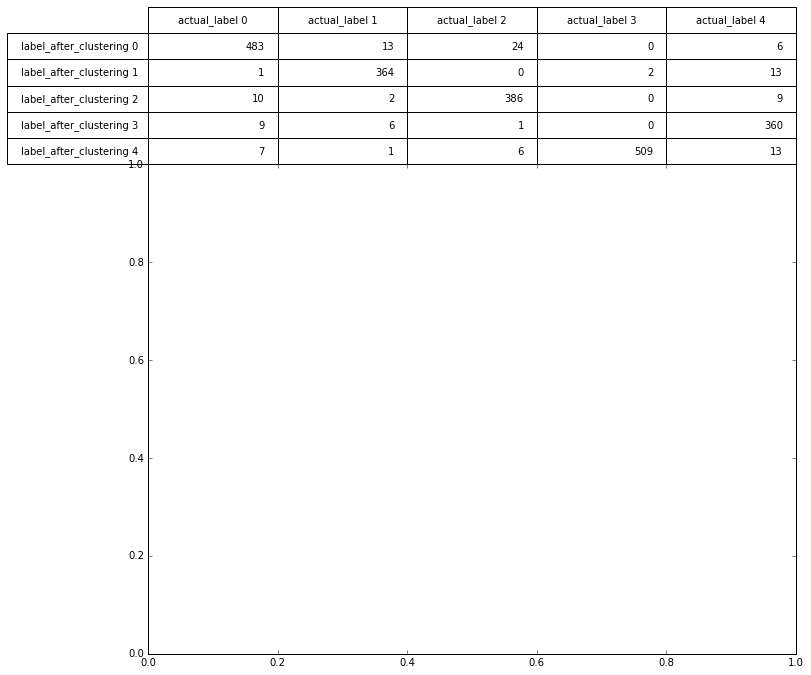

In [15]:
countOfRealLabelsInEachCluster = {}
cellText = []
for clusterLabels in dictOfRealLabelsForDocumentsInEachCluster:        
    ListOfcountOfEachLabelInEachCluster = []
    for label in range(k):
        ListOfcountOfEachLabelInEachCluster.append(dictOfRealLabelsForDocumentsInEachCluster[clusterLabels].count(label))
    cellText.append(ListOfcountOfEachLabelInEachCluster)
plt.table(cellText=cellText,
          colLabels=['actual_label 0','actual_label 1','actual_label 2','actual_label 3','actual_label 4'],
          loc='top',
        rowLabels = ['label_after_clustering 0','label_after_clustering 1','label_after_clustering 2','label_after_clustering 3','label_after_clustering 4']
         )
plt.subplots_adjust(top=1.7,left=2,right=3.5,bottom=.001)

Based on the table above we can say that cluster 0 is for label 0, cluster 1 is for label 1, cluster 2 is for label 2 , cluster 3 is for label 4 and cluster 4 is for label 3.